In [1]:
!pip install category_encoders

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import category_encoders as ce

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Подготовка данных

In [3]:
data = pd.read_csv("Data/car_evaluation.csv", header=None)
data.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [4]:
encoder = ce.OrdinalEncoder(cols = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
data = encoder.fit_transform(data)
data

,buying,maint,doors,persons,lug_boot,safety,class
0,1,1,1,1,1,1,unacc
1,1,1,1,1,1,2,unacc
2,1,1,1,1,1,3,unacc
3,1,1,1,1,2,1,unacc
4,1,1,1,1,2,2,unacc
...,...,...,...,...,...,...,...
1723,4,4,4,3,2,2,good
1724,4,4,4,3,2,3,vgood
1725,4,4,4,3,3,1,unacc
1726,4,4,4,3,3,2,good


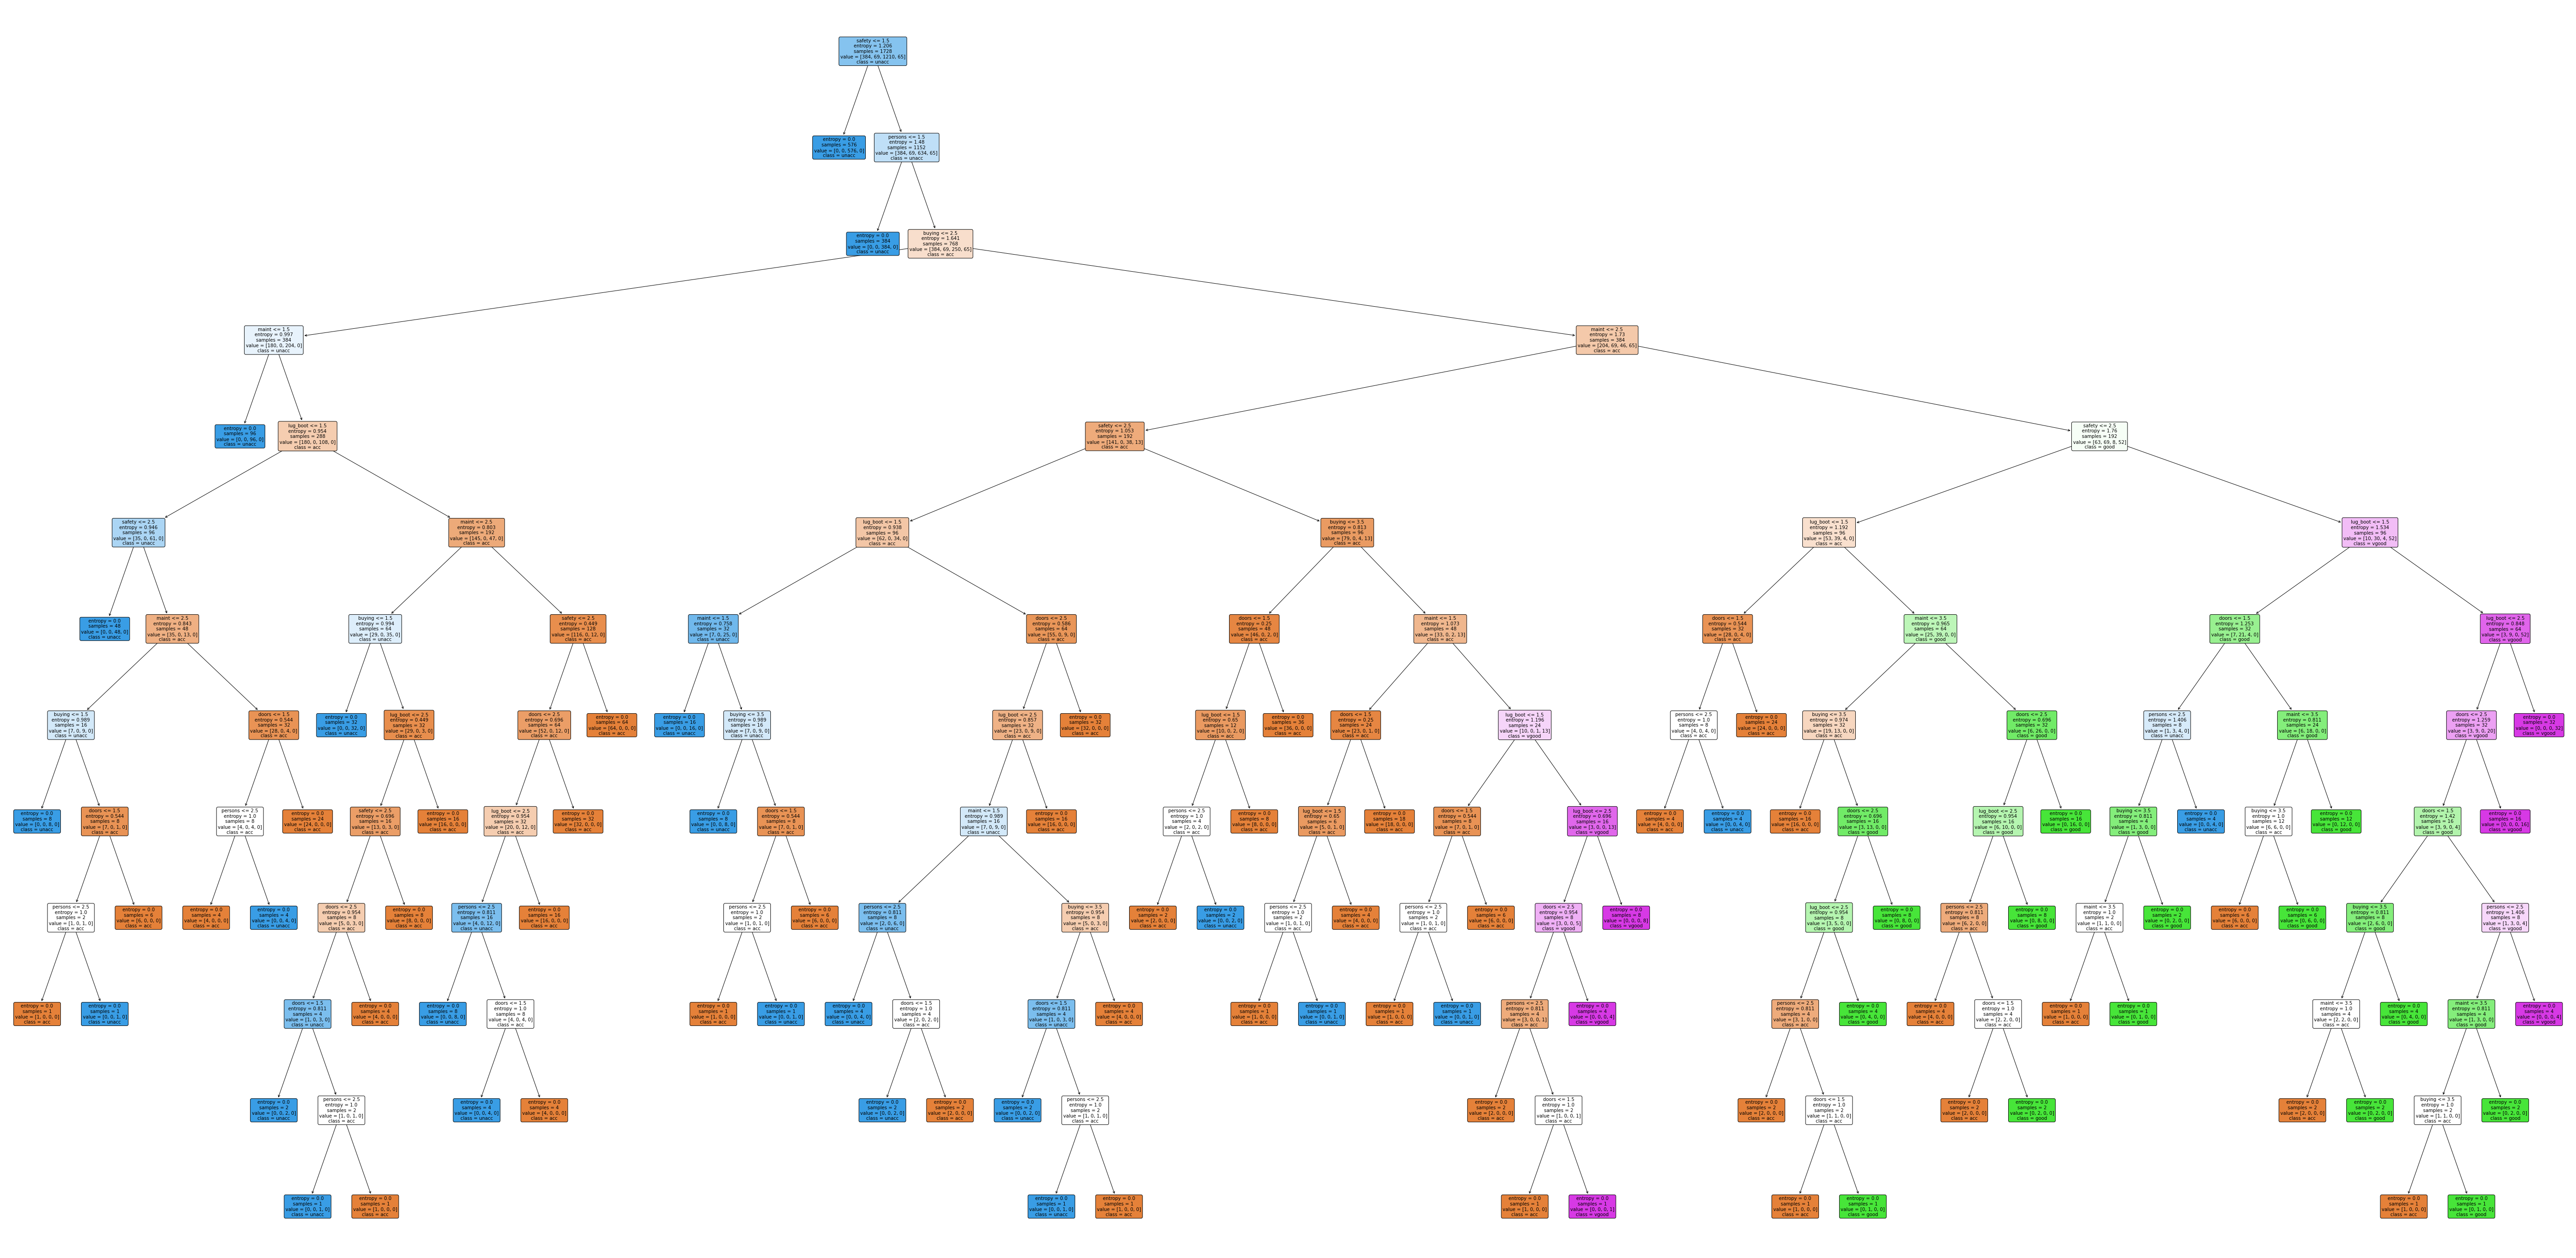

In [5]:
plt.figure(figsize=(100, 50))

dtc_inf_gain = DecisionTreeClassifier(criterion='entropy')
dtc_inf_gain.fit(data.drop(['class'], axis=1), data['class'])
_ = tree.plot_tree(decision_tree=dtc_inf_gain,
                   feature_names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'],
                   class_names=['acc', 'good', 'unacc', 'vgood'],
                   rounded=True,
                   filled=True)

# Визуализация

## Сравнение байесовской классификации и деревьев решений

In [6]:
sample_ratios = np.arange(0.6, 0.9, 0.05)
gnb = GaussianNB()
dtc_inf_gain = DecisionTreeClassifier(criterion='entropy')
dtc_gini = DecisionTreeClassifier(criterion='gini')

accuracy_scores = {'gnb': [], 
                   'dtc_inf_gain': [], 
                   'dtc_gini': []
                  }

precision_scores = {'gnb': [], 
                    'dtc_inf_gain': [], 
                    'dtc_gini': []
                   }

recall_scores = {'gnb': [], 
                 'dtc_inf_gain': [], 
                 'dtc_gini': []
                }

f1_scores = {'gnb': [], 
             'dtc_inf_gain': [], 
             'dtc_gini': []
            }

for ratio in sample_ratios:
    X_train, X_test, y_train, y_test = train_test_split(data.drop(['class'], axis=1), data['class'], 
                                                    train_size=ratio, random_state=1)
    
    gnb_pred = gnb.fit(X_train, y_train).predict(X_test)
    dtc_inf_gain_pred = dtc_inf_gain.fit(X_train, y_train).predict(X_test)
    dtc_gini_pred = dtc_gini.fit(X_train, y_train).predict(X_test)
    
    accuracy_scores['gnb'].append(accuracy_score(y_test, gnb_pred))
    accuracy_scores['dtc_inf_gain'].append(accuracy_score(y_test, dtc_inf_gain_pred))
    accuracy_scores['dtc_gini'].append(accuracy_score(y_test, dtc_gini_pred))
    
    precision_scores['gnb'].append(precision_score(y_test, gnb_pred, average='macro'))
    precision_scores['dtc_inf_gain'].append(precision_score(y_test, dtc_inf_gain_pred, average='macro'))
    precision_scores['dtc_gini'].append(precision_score(y_test, dtc_gini_pred, average='macro'))
    
    recall_scores['gnb'].append(recall_score(y_test, gnb_pred, average='macro'))
    recall_scores['dtc_inf_gain'].append(recall_score(y_test, dtc_inf_gain_pred, average='macro'))
    recall_scores['dtc_gini'].append(recall_score(y_test, dtc_gini_pred, average='macro'))
    
    f1_scores['gnb'].append(f1_score(y_test, gnb_pred, average='macro'))
    f1_scores['dtc_inf_gain'].append(f1_score(y_test, dtc_inf_gain_pred, average='macro'))
    f1_scores['dtc_gini'].append(f1_score(y_test, dtc_gini_pred, average='macro'))

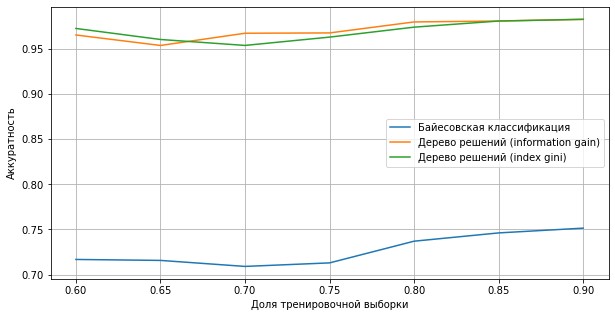

In [7]:
plt.figure(figsize=(10, 5))
plt.grid()

plt.plot(sample_ratios, accuracy_scores['gnb'], label='Байесовская классификация')
plt.plot(sample_ratios, accuracy_scores['dtc_inf_gain'], label='Дерево решений (information gain)')
plt.plot(sample_ratios, accuracy_scores['dtc_gini'], label='Дерево решений (index gini)')
plt.legend()

plt.xticks(sample_ratios)

plt.xlabel("Доля тренировочной выборки")
plt.ylabel("Аккуратность")

plt.show()

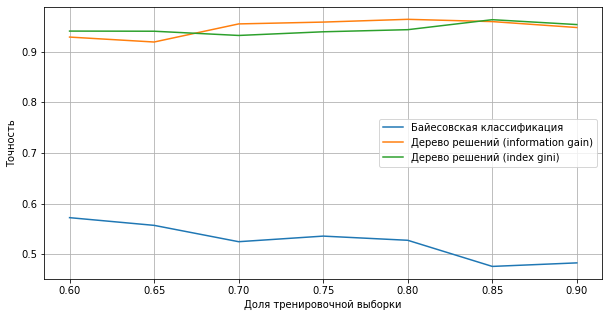

In [8]:
plt.figure(figsize=(10, 5))
plt.grid()

plt.plot(sample_ratios, precision_scores['gnb'], label='Байесовская классификация')
plt.plot(sample_ratios, precision_scores['dtc_inf_gain'], label='Дерево решений (information gain)')
plt.plot(sample_ratios, precision_scores['dtc_gini'], label='Дерево решений (index gini)')
plt.legend()

plt.xticks(sample_ratios)

plt.xlabel("Доля тренировочной выборки")
plt.ylabel("Точность")

plt.show()

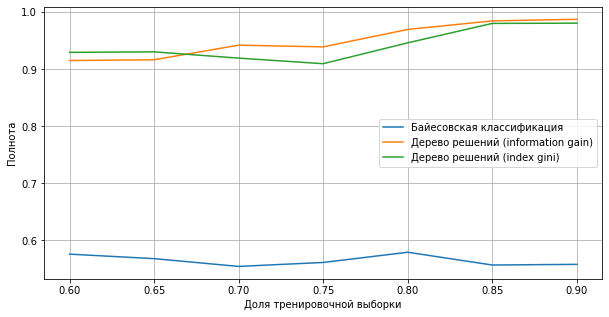

In [9]:
plt.figure(figsize=(10, 5))
plt.grid()

plt.plot(sample_ratios, recall_scores['gnb'], label='Байесовская классификация')
plt.plot(sample_ratios, recall_scores['dtc_inf_gain'], label='Дерево решений (information gain)')
plt.plot(sample_ratios, recall_scores['dtc_gini'], label='Дерево решений (index gini)')
plt.legend()

plt.xticks(sample_ratios)

plt.xlabel("Доля тренировочной выборки")
plt.ylabel("Полнота")

plt.show()

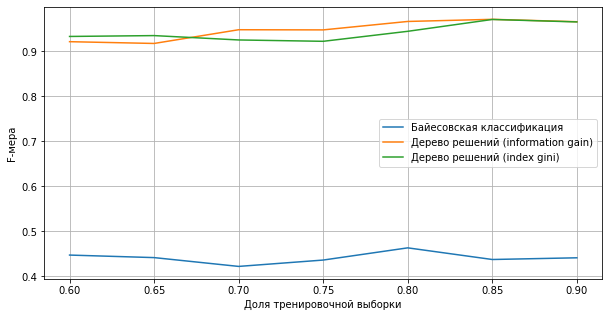

In [10]:
plt.figure(figsize=(10, 5))
plt.grid()

plt.plot(sample_ratios, f1_scores['gnb'], label='Байесовская классификация')
plt.plot(sample_ratios, f1_scores['dtc_inf_gain'], label='Дерево решений (information gain)')
plt.plot(sample_ratios, f1_scores['dtc_gini'], label='Дерево решений (index gini)')
plt.legend()

plt.xticks(sample_ratios)

plt.xlabel("Доля тренировочной выборки")
plt.ylabel("F-мера")

plt.show()

## Сравнение всех методов классификации при доле тренировочной выборки 60%

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['class'], axis=1), data['class'], 
                                                    train_size=0.6, random_state=1)

x_values = []
y_values_accuracy = []
y_values_precision = []
y_values_recall = []
y_values_f1 = []

gnb = GaussianNB()
gnb_pred = gnb.fit(X_train, y_train).predict(X_test)
x_values.append('Байесовская классификация')
y_values_accuracy.append(accuracy_score(y_test, gnb_pred))
y_values_precision.append(precision_score(y_test, gnb_pred, average='macro'))
y_values_recall.append(recall_score(y_test, gnb_pred, average='macro'))
y_values_f1.append(f1_score(y_test, gnb_pred, average='macro'))

dtc = DecisionTreeClassifier(criterion='entropy')
dtc_pred = dtc.fit(X_train, y_train).predict(X_test)
x_values.append('Дерево решений (information gain)')
y_values_accuracy.append(accuracy_score(y_test, dtc_pred))
y_values_precision.append(precision_score(y_test, dtc_pred, average='macro'))
y_values_recall.append(recall_score(y_test, dtc_pred, average='macro'))
y_values_f1.append(f1_score(y_test, dtc_pred, average='macro'))

dtc = DecisionTreeClassifier(criterion='gini')
dtc_pred = dtc.fit(X_train, y_train).predict(X_test)
x_values.append('Дерево решений (index gini)')
y_values_accuracy.append(accuracy_score(y_test, dtc_pred))
y_values_precision.append(precision_score(y_test, dtc_pred, average='macro'))
y_values_recall.append(recall_score(y_test, dtc_pred, average='macro'))
y_values_f1.append(f1_score(y_test, dtc_pred, average='macro'))

for i in range(50, 101, 10):
    bc = BaggingClassifier(n_estimators=i)
    bc_pred = dtc.fit(X_train, y_train).predict(X_test)
    x_values.append('Бэггинг (%d)' % i)
    y_values_accuracy.append(accuracy_score(y_test, bc_pred))
    y_values_precision.append(precision_score(y_test, bc_pred, average='macro'))
    y_values_recall.append(recall_score(y_test, bc_pred, average='macro'))
    y_values_f1.append(f1_score(y_test, bc_pred, average='macro'))
    
for i in range(50, 101, 10):
    rfc = RandomForestClassifier(n_estimators=i)
    rfc_pred = dtc.fit(X_train, y_train).predict(X_test)
    x_values.append('Случайный лес (%d)' % i)
    y_values_accuracy.append(accuracy_score(y_test, rfc_pred))
    y_values_precision.append(precision_score(y_test, rfc_pred, average='macro'))
    y_values_recall.append(recall_score(y_test, rfc_pred, average='macro'))
    y_values_f1.append(f1_score(y_test, rfc_pred, average='macro'))
    
for i in range(50, 101, 10):
    gbc = GradientBoostingClassifier(n_estimators=i)
    gbc_pred = dtc.fit(X_train, y_train).predict(X_test)
    x_values.append('Бустинг (%d)' % i)
    y_values_accuracy.append(accuracy_score(y_test, gbc_pred))
    y_values_precision.append(precision_score(y_test, gbc_pred, average='macro'))
    y_values_recall.append(recall_score(y_test, gbc_pred, average='macro'))
    y_values_f1.append(f1_score(y_test, gbc_pred, average='macro'))

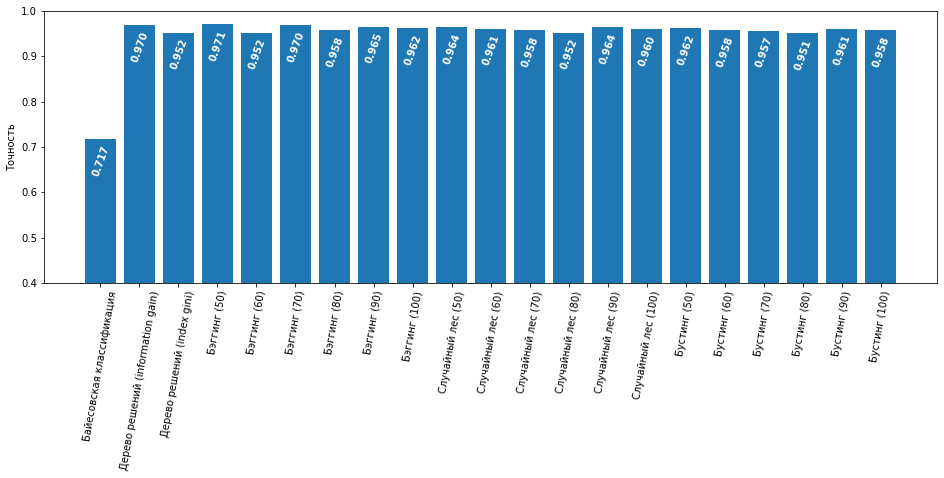

In [12]:
plt.figure(figsize=(16, 5))

plt.bar(x_values, y_values_accuracy)

plt.xticks(rotation=80)
plt.ylabel("Точность")

for index, value in enumerate(y_values_accuracy):
    plt.text(index - 0.25, value - 0.08, str("%.3f" % value), 
             color = 'white', fontweight = 'bold', rotation = 70)

ax = plt.gca()
ax.set_ylim([0.4, 1.0])

plt.show()

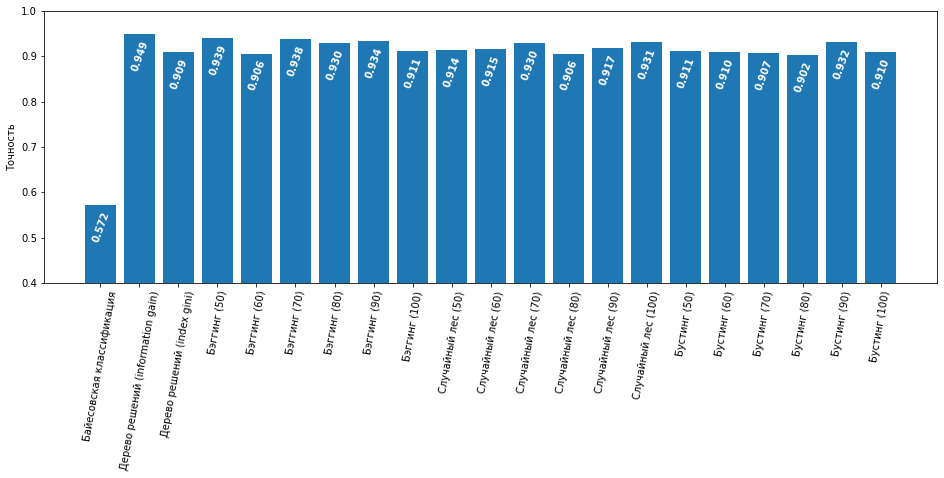

In [13]:
plt.figure(figsize=(16, 5))

plt.bar(x_values, y_values_precision)

plt.xticks(rotation=80)
plt.ylabel("Точность")

for index, value in enumerate(y_values_precision):
    plt.text(index - 0.25, value - 0.08, str("%.3f" % value), 
             color = 'white', fontweight = 'bold', rotation = 70)

ax = plt.gca()
ax.set_ylim([0.4, 1.0])

plt.show()

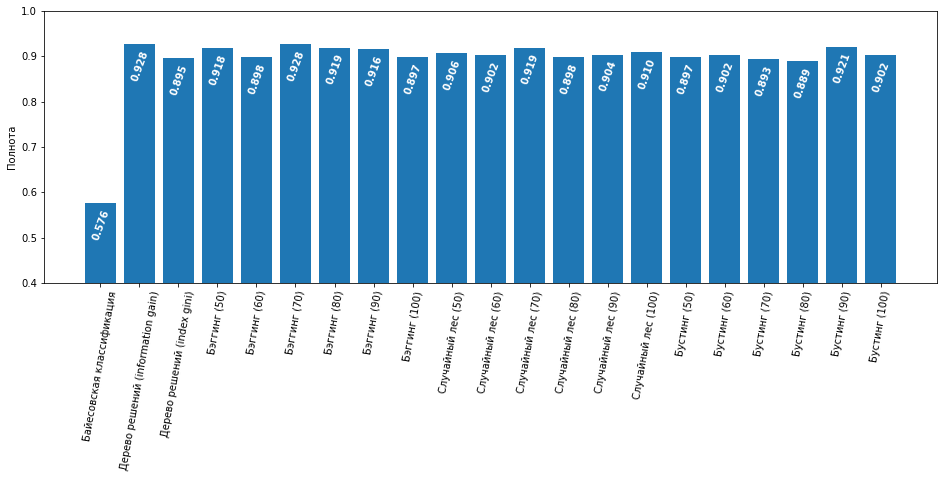

In [14]:
plt.figure(figsize=(16, 5))

plt.bar(x_values, y_values_recall)

plt.xticks(rotation=80)
plt.ylabel("Полнота")

for index, value in enumerate(y_values_recall):
    plt.text(index - 0.25, value - 0.08, str("%.3f" % value), 
             color = 'white', fontweight = 'bold', rotation = 70)

ax = plt.gca()
ax.set_ylim([0.4, 1.0])

plt.show()

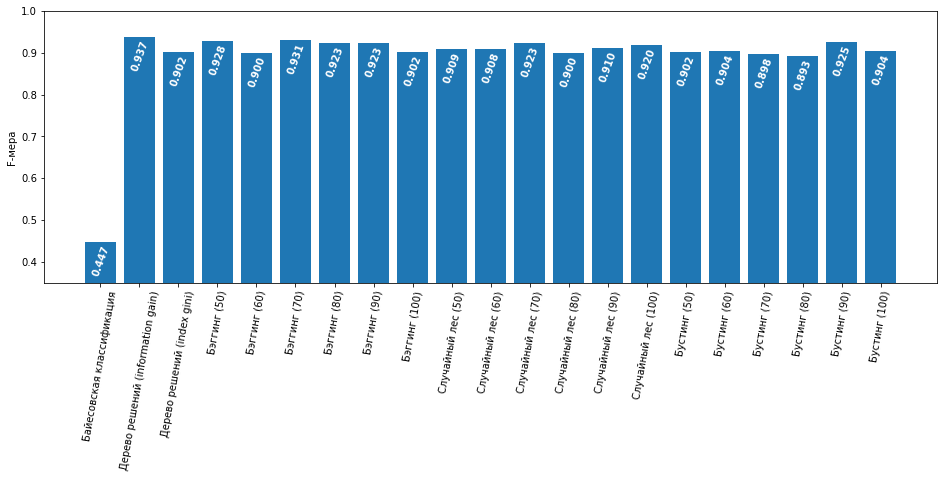

In [15]:
plt.figure(figsize=(16, 5))

plt.bar(x_values, y_values_f1)

plt.xticks(rotation=80)
plt.ylabel("F-мера")

for index, value in enumerate(y_values_f1):
    plt.text(index - 0.25, value - 0.08, str("%.3f" % value), 
             color = 'white', fontweight = 'bold', rotation = 70)

ax = plt.gca()
ax.set_ylim([0.35, 1.0])

plt.show()